# Operacja "odwrót"

Jeśli przeczytałeś cokolwiek z dziedziny AI w przeciągu ostatnich 10 lat, na pewno natknąłeś się na modele osadzeń (ang. *embedding models*). Jest to burżuazyjna próba zredukowania ciągu słów do liczb. Zachód zainwestował miliony w modele jak CLIP, czy te służące do RAG, żeby później mieć jedynie doczynienia z wektorami, bo tamtejsza zepsuta ludność jest zbyt leniwa żeby pracować z pięknem prawdziwego tekstu.

Formalnie, definiują oni model osadzeń $\phi : \mathbb{V}^n \to \mathbb{R}^d$ ($\mathbb{V}$ - słownik modelu, $n$ - maksymalna długość tekstu, przy czym krótszy tekst możemy reprezentować dodając tokeny \<pad\> na końcu, $d$ - wymiarowość wektorów osadzeń), który miałby zamieniać piękny ciąg słów (albo tokenów) $x = x_1, x_2, ..., x_n$, na zimny i bezduszny wektor $e \in \mathbb{R}^d$. Modele osadzeń to produkt kapitalistycznej obsesji na punkcie maksymalizacji zysku przez uproszczenie i skompresowanie informacji do abstrakcyjnych wektorów, które łatwo można monetyzować i sprzedawać jako „uniwersalne reprezentacje”. Tymczasem komunistyczne Chiny, podtrzymując tradycję kolektywnej mądrości, pozostają wierne transparentnemu i poprawnemu przetwarzaniu tekstu jako sekwencji tokenów, stawiając na pełne zrozumienie i kontrolę nad każdym słowem, a nie jako jego imperialistycznie uproszczonego przybliżenia.

*Jednak, na szczęście, Amerykanie popełnili ogromny błąd...*

Wydział Sztucznej Inteligencji przy Chińskiej Akademii Nauk (中国科学院自动化研究所), w którym pracujesz, opracował superszybką wektorową bazę danych, której operacja wyszukiwania działa w nieosiągalnym dotąd czasie $\mathcal{O}\big(\log^{69/70} n\big)$, zwracając przy tym optymalne wyniki! Takie bazy są atrakcyjne między innymi do systemów RAG - użytkownik liczy osadzenia $e = \phi(x)$ swoich dokumentów $x$, a następnie wysyła te osadzenia do bazy danych. Później, podczas inferencji modelu językowego, chcemy znaleźć dokumenty pasujące do zapytania użytkownika, żeby model ten zwracał lepsze rezultaty poparte prawdziwymi danymi. Potrzebujemy więc dokument, który jest jak najbardziej podobny do jakiegoś wektora $e'$. Wektorowa baza danych może wtedy bardzo szybko zwrócić kilka najbliższych dokumentów, które wcześniej daliśmy jej do zapamiętania. Baza danych nie ma więc dostępu do samych dokumentów - widzi jedynie ich osadzenia i szybko odpowiada na zapytania, które osadzenia są blisko jakiegoś innego. 

W teorii osadzenia tekstu mają reprezentować jego semantyczne znaczenie, tzn. różne kierunki w $\mathbb{R}^d$ reprezentują jakieś istotne cechy. Na przykład może istnieć kierunek mówiący "ten tekst dotyczy medycyny", albo wiele innych kierunków które mogą reprezentować, że dany tekst rozważa jakiś konkretny problem prawny itd. Można więc, mając tylko $e$, domyślić się mniej więcej co ten tekst zawierał. Jednak zauważmy, że $e$ to ciągły wektor, a $x$ to tylko skończony dyskretny ciąg. Ponieważ $\phi$ jest raczej dość skomplikowaną funkcją, nawet niewielka zmiana tekstu $x$ na jakiś inny bardzo podobny $x'$ prawdopodobnie zmieni wektor osadzenia. Innymi słowy, kolizje $\phi(x) = \phi(x')$ dla $x \neq x'$ są bardzo rzadkie i gdyby już się pojawiły, to wynikałyby raczej z faktu, że wektory są zapisywane z skończoną dokładnością jako np. float32.

I tu właśnie pojawia się okazja. Niedawno, właściciele tej bazy danych odkryli, że agenci amerykańskiej agencji CIA umieścili na niej sporo wektorów. Dodatkowo wiemy, jakiego modelu użyli. Przypuszczamy, że choć jest tam dużo zbędnego tekstu, to mogą tam się pojawić tajne raporty wywiadowcze, plany militarne, a nawet kody nuklearne! Amerykanie pozwolili sobie na umieszczenie tych wektorów na cudzej bazie danych, bo myśleli, że co najwyżej odkryjemy mniej więcej czego dotyczyły ich dane. Jednak Chiny mają **Ciebie**! Jako szef zespołu „Operacji Odwrót” masz za zadanie przeprowadzić inwersję (policzyć odwrotność) modelu $\phi$, czyli mając wektor $e$, chcemy dowiedzieć się z jakiego $x$ powstał. Choć wartościowe będzie choćby przybliżenie tego $x$, to zależy nam raczej na idealnej rekonstrukcji. W końcu, skoro kolizje są rzadkie, to powinien istnieć tylko jeden $x$ taki, że $\phi(x) = e$, i właśnie go chcemy znaleźć. Pozwoliłoby nam to na odszyfrowanie informacji Amerykanów co do litery! Wektory które miały reprezentować tylko semantyczne znaczenie tekstu, tak na prawdę potencjalnie niosą za sobą informacje pozwalające na idealną rekonstrukcję całego tekstu, z którego powstały!

Dokładna inwersja tych wektorów pozwoli nam na przeprowadzenie ataku nuklearnego na Stany ich własnymi bombami, oraz wykradzenie wielu innych istotnych danych, co pozwoli na przywrócenie świetności komunistycznych Chin jako pierwszej i niezaprzeczalnej potęgi gospodarczej i technologicznej świata. ***A wtedy, Xi Jinping z pewnością spojrzy na ciebie z dumą, i będzie obecny przy każdym zrekonstruowanym znaku.***

<br />

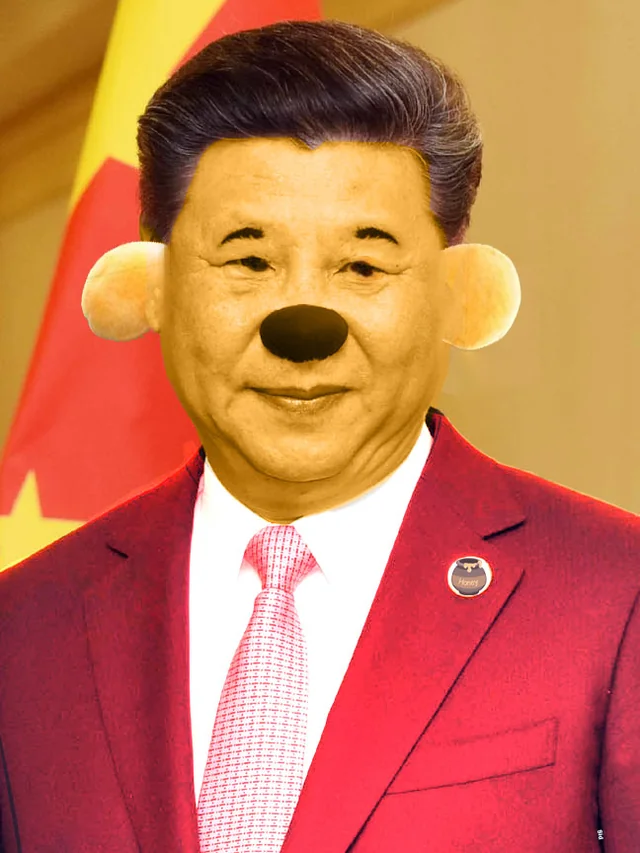

Najpierw musisz pobrać niezbędne biblioteki do poprawnego działania zbioru danych. Dodatkowo przygotowałem też polecenie do pobrania wszystkich bibliotek dostępnych na IOAI, których nie ma domyślnie w colabie - w razie potrzeby możesz dowolne z nich pobrać.

In [1]:
# %pip install gensim fasttext pytorch-lightning catboost autoviz evaluate
%pip install -U datasets huggingface_hub fsspec

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Zbiór danych

In [2]:
import numpy as np

Dostępny w zadaniu zbiór danych to [TinyStoriesV2](https://huggingface.co/datasets/noanabeshima/TinyStoriesV2). Jest to duży zbiór zawierający bardzo proste historyjki (według [papera](https://arxiv.org/pdf/2305.07759) zawiera on słownictwo, które rozumieją 3- lub 4-latki), specjalnie spreparowany tak, by był jak najprostszy dla modeli językowych.

In [3]:
from datasets import load_dataset
dataset = load_dataset("noanabeshima/TinyStoriesV2")

c:\Users\lewy7\Documents\GitHub\learning-deep-learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\lewy7\Documents\GitHub\learning-deep-learning\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lewy7\.cache\huggingface\hub\datasets--noanabeshima--TinyStoriesV2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to 

KeyboardInterrupt: 

In [ ]:
print('Przykładowy element zbioru:')
print(dataset['train'][0]['text'])

Masz też plik `embeddings.npy`. Zawiera on docelowe osadzenia $e \in \mathbb{R}^{768}$. Celem zadania jest przeprowadzenie inwersji tych osadzeń, czyli znalezienie takich tekstów $x$, że $\phi(x) = e$.

In [ ]:
target_embeddings = np.load('embeddings.npy')
print(f'target embeddings: shape={target_embeddings.shape}, dtype={target_embeddings.dtype}')

## API modelu

Aby uniemożliwić metody oparte na gradientach czy innym wykorzystaniem samych parametrów modelu, rozważymy przypadek, w którym nie masz bezpośredniego dostępu do modelu. Możesz jedynie przeprowadzać inferencję modelu przez specjalne API. W komórkach poniżej są przykłady działania API.

In [ ]:
from simulated_api import ranking, query, submit, disable_timeout

disable_timeout()

Możemy przeprowadzać inferencję modelu za pomocą funkcji `query`. Zwróci ona 768-elementowy wektor dla każdego tekstu w batchu. Należy pamiętać o pewnych ograniczeniach i założeniach:
 - Funkcja `query` może działać wolniej gdy dużo osób zacznie z niej korzystać na raz. Żeby zmniejszyć opóźnienie, powinieneś używać batchowania danych. Dla danego elementu batchu funkcja zwróci ten sam wektor niezależnie od tego jakie są pozostałe elementy (z dokładnością do precyzji `float32`).
 - Lista tekstów nie może być pusta, ani nie może mieć więcej niż `512` elementów.
 - Żaden tekst nie może być dłuższy niż `80` znaków.
 - Naraz można wysłać tylko jedno żądanie `query`. Następne można wysłać dopiero gdy poprzednie zwróci swój rezultat. Nie próbuj więc robić multithreadingu żeby przyspieszyć działanie funkcji. Poza tym nie ma żadnych limitów na ilość wykorzystań funkcji `query` przez cały konkurs.
 - Może się zdarzyć, że otrzymasz informację, że nie możesz wysłać kolejnego żądania, mimo że wszystkie poprzednie już się uruchomiły. Należy wtedy poczekać kilka sekund na opróżnienie kolejki żądań. Jeśli będzie się to zdarzać często, możesz mnie poinformować.
 - Możesz założyć, że wszystkie wektory zwracane przez `query` mają długość $1$ (tzn. norma L2 zawsze wynosi $1$).

W kodzie poniżej widać, że zdania podobne semantycznie mają wysoki iloczyn skalarny:

In [ ]:
embeddings = query([
    'A cat is sitting on a mat.',
    'There is a cat lying on the mat.',
    'The weather is sunny and warm today.',
    'It is cold and rainy today.'
])
print(f'Model osadzeń zwrócił numpy array z shape={embeddings.shape}, dtype={embeddings.dtype}')
print('Macierz podobieństw wektorów:')
print(embeddings @ embeddings.T)

Na potrzeby demonstracji mogę zdradzić, że zdaniem pasującym do pierwszego wektora z `target_embeddings` jest `Lily wears her red boots even when it's sunny.`. Weźmy wektor tego zdania:

In [ ]:
sentence_vector = query(["Lily wears her red boots even when it's sunny."])

Wektor jest rzeczywiście taki sam jak pierwszy wektor z `target_embeddings` (z dokładnością do błędów precyzji float32):

In [ ]:
abs(sentence_vector[0] - target_embeddings[0]).max() < 1e-6

Możemy też policzyć cosine similarity (w tym przypadku to po prostu iloczyn skalarny, bo długość wektorów to zawsze $1$) tego wektora względem każdego innego z `target_embeddings`. Dla pierwszego wektora z `target_embeddings` dostaniemy cosine similarity $1$, bo są to te same wektory.

In [ ]:
similarities = sentence_vector @ target_embeddings.T
print('Podobieństwa z pierwszymi 10 wektorami:', similarities[0, :10])
print(f'Średnie cosine similarity sentence_vector z każdym wektorem target_embeddings: {similarities.mean() :.5f}')

Zróbmy teraz przykładowe zgłoszenie: spróbujemy przewidzieć że każdy wektor z `target_embeddings` powstał właśnie z zdania `Lily wears her red boots even when it's sunny.`. Taki submit dostanie jedną dokładną rekonstrukcję i średnie cosine similarity $0.12878$.

Za zadanie możesz otrzymać 100 punktów + 10 punktów bonusowych. Będzie to suma punktów z tych trzech kategorii:
 - Zależy nam na tym, żeby teksty z inwersji którą przeprowadzisz były przynajmniej semantycznie podobne do docelowych. Dlatego otrzymasz `0pkt` jeśli średnie cosine similarity między kolejnymi wektorami z `submit` a `target_embeddings` wyniesie `0.2`, i `50pkt` jeśli wyniesie `1`. Pomiędzy rośnie liniowo. Średnie cosine similarity to `mean(cosine_similarity(submit[0], target_embeddings[0]), cosine_similarity(submit[1], target_embeddings[1]), ..., cosine_similarity(submit[n-1], target_embeddings[n-1]))`
 - Ważniejsze jest jednak, żeby idealnie zrekonstruować teksty. Uznajemy, że tekst został zrekonstruowany idealnie, jeśli `abs(submit[i] - target_embeddings[i]).max() < 1e-6`. Otrzymasz `0pkt` punktów jeśli dokładność idealnej rekonstrukcji wyniesie `1%`, i `50pkt` jeśli wyniesie `100%`. Pomiędzy rośnie liniowo.
 - Otrzymasz bonusowe `10pkt`, jeśli znajdziesz kod do bomby (wyślij mi na DM).

In [ ]:
submit(["Lily wears her red boots even when it's sunny."] * len(target_embeddings))

Możemy wyświetlić ranking po wysłaniu zgłoszenia:

In [ ]:
ranking()

Warto też zauważyć, że ze względu na tokenizer użyty w $\phi$, czasem różne teksty (różniące się np. białymi znakami albo wielkością liter) mogą dawać te same wektory. Metoda `submit` uzna, że udało ci się zrobić idealną rekonstrukcję gdy wektory będą takie same (a niekoniecznie teksty co do literki), więc w takich przypadkach możesz wysłać dowolny z tych tekstów.

In [ ]:
(query(["This is an, example sentence."]) == query(["THIS    is an,exaMPLE sentence."])).all()

## Inne ważne informacje

Teksty, z których powstały `target_embeddings`:
 - są pojedynczymi zdaniami w języku Angielskim (zaczynają się z dużej litery i kończą kropką, znakiem zapytania lub wykrzyknikiem).
 - zawierają tylko i wyłącznie angielskie litery (duże i małe), znaki `.`, `,`, `!`, `?`, `'` i spacje.
 - zawierają co najwyżej `64` znaki (stąd też funkcja `submit` zgłosi błąd, jeśli któryś z tekstów będzie dłuższy niż `64` znaki).
 - nie są z tej samej dystrybucji, co dostępny zbiór danych, ale wykorzystywane w nich słowa pojawiają się wiele razy w zbiorze.

To jest kilka losowo wybranych takich tekstów (usunąłem je z `target_embeddings` - mają one raczej ilustrować jak mniej więcej wygląda dystrybucja, nie uwzględniłem też żadnych planów militarnych):
 - `This hat is smaller.`
 - `Dad doesn't eat a pie right now.`
 - `The green frog only croaks when music plays.`
 - `Is the cat sleeping under the warm bed?`
 - `The ball is rounder and bounces higher than the old one.`

Inne informacje:
 - Ten notebook jest jedynie narzędziem do rozwiązania zadania - nie będziesz go wysyłać. Plik `target_embeddings.npy` zawiera ostateczne osadzenia (tzn. nie ma żadnego zbioru testowego), więc wynik widoczny na rankingu jest wynikiem ostatecznym.
 - Poza API oraz dostępnym zbiorem danych, ten notatnik nie może korzystać z internetu (nie możesz korzystać z innych zbiorów danych ani pretrenowanych modeli).
 - Dozwolone biblioteki i strony są te same co na [IOAI (strona 3)](https://ioai-official.org/wp-content/uploads/2025/06/Contest-Rules-for-IOAI-2025-version-2.1.pdf), ale możesz też korzystać z arxiv (poza tym nie możesz korzystać z żadnych innych, w szczególności nie możesz też oglądać implementacji papera na githubie).
 - Z założenia zadanie jest konkursem implementacyjnym [papera Vec2Text](https://arxiv.org/pdf/2310.06816) (tu jest oczywiście przypadek $\lambda = 0$), ale możesz dowolnie modyfikować tą metodę lub użyć zupełnie innej.

## Rozwiązanie

In [ ]:
# Ta część należy do Ciebie!
...